# Basic Testing

In this notebook we test that the main files work well.

## Setup

In [1]:
from imports import *
from agents import BetaAgent
from model import Model

## Try with variance

In [24]:
n_agents = 100
my_network = nx.gnp_random_graph(n_agents, p=0.2, directed=True) #nx.complete_graph(n_agents, create_using=nx.DiGraph())

In [41]:
seed=420
my_model = Model(my_network, n_experiments=30, uncertainty=0.001,
                 histories=True,sampling_update=False,variance_stopping = True,directed_network = True,
                 seed=seed,seeded=False, agent_class=BetaAgent)
my_model.run_simulation(number_of_steps=10000,show_bar=True) #number_of_steps is a max amount\n",
print('steps: ',my_model.n_steps)
print('conclusion: ',my_model.conclusion)
df = pd.DataFrame(my_model.agent_histories)
df.head(3)

  0%|          | 8/10000 [00:00<13:17, 12.54it/s]

steps:  9
conclusion:  0.65


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,"[0.9745589585756758, 0.8369672786258944]","[0.48343103462316295, 0.8369672786258944]","[0.48343103462316295, 0.5407385468828368]","[0.507758358355321, 0.5407385468828368]","[0.507758358355321, 0.48251765253951734]","[0.5032768005228897, 0.48251765253951734]","[0.5032768005228897, 0.49129363332976594]","[0.5002653132311351, 0.49129363332976594]","[0.5002653132311351, 0.496474604048271]","[0.5022451737135165, 0.496474604048271]","[0.5022451737135165, 0.4948919554476152]","[0.4980799090235257, 0.4948919554476152]","[0.4980799090235257, 0.5050719050154194]","[0.5004795858090261, 0.5050719050154194]","[0.5004795858090261, 0.496812899079985]","[0.5024281836570682, 0.496812899079985]","[0.5024281836570682, 0.4941420541805485]","[0.5006424688208742, 0.4941420541805485]","[0.5006424688208742, 0.49872157101728265]"
1,"[0.3026941100798602, 0.9476150185341145]","[0.5181645039832206, 0.9476150185341145]","[0.5181645039832206, 0.5174127199456438]","[0.5181717933969013, 0.5174127199456438]","[0.5181717933969013, 0.4920753499252232]","[0.5179074165173451, 0.4920753499252232]","[0.5179074165173451, 0.5049124444013963]","[0.5021391200409634, 0.5049124444013963]","[0.5021391200409634, 0.5089630916014505]","[0.49929572586473037, 0.5089630916014505]","[0.49929572586473037, 0.509801937072404]","[0.5025651859651581, 0.509801937072404]","[0.5025651859651581, 0.5050514852697227]","[0.4991176410462916, 0.5050514852697227]","[0.4991176410462916, 0.49934190836572157]","[0.4963384177577862, 0.49934190836572157]","[0.4963384177577862, 0.49977353118819107]","[0.4985024474781371, 0.49977353118819107]","[0.4985024474781371, 0.5055951961325674]"
2,"[0.49215433091963984, 0.4748354793058704]","[0.5529066606276606, 0.4748354793058704]","[0.5529066606276606, 0.5149018995782999]","[0.5232261501541131, 0.5149018995782999]","[0.5232261501541131, 0.5125752543567661]","[0.5186128124768824, 0.5125752543567661]","[0.5186128124768824, 0.5118984023928135]","[0.5095654328237157, 0.5118984023928135]","[0.5095654328237157, 0.5031631835041095]","[0.5168870702053144, 0.5031631835041095]","[0.5168870702053144, 0.49820347140651605]","[0.5138765548381782, 0.49820347140651605]","[0.5138765548381782, 0.5013797356562583]","[0.5121174016237328, 0.5013797356562583]","[0.5121174016237328, 0.503921018426512]","[0.5079836320255996, 0.503921018426512]","[0.5079836320255996, 0.508644060476589]","[0.5011588936438419, 0.508644060476589]","[0.5011588936438419, 0.5088875937055056]"


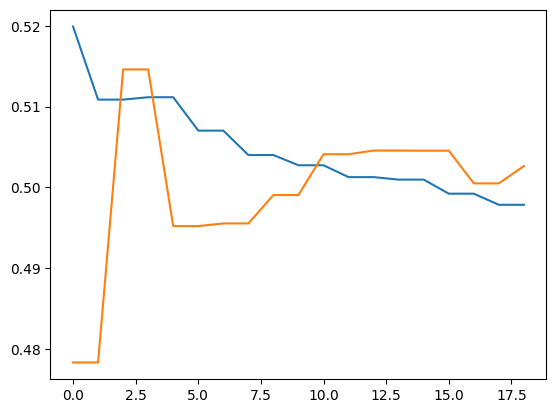

In [42]:
#Extract the first coordinate (x) for each pair and calculate column-wise mean
x_means = df.applymap(lambda pair: pair[0]).mean()
y_means = df.applymap(lambda pair: pair[1]).mean()
plt.plot(x_means)
plt.plot(y_means)

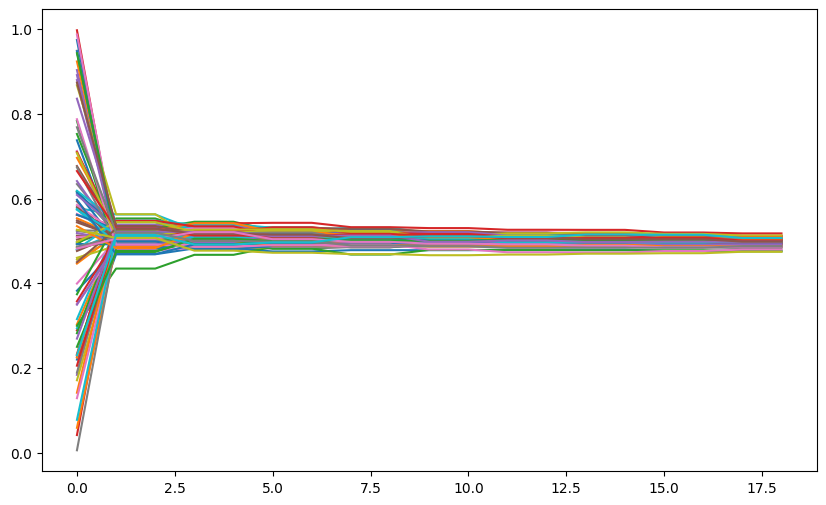

In [43]:
# Extract the first coordinate (x) for each pair
x_values = df.applymap(lambda pair: pair[0])

# Plot the first coordinate for each row
plt.figure(figsize=(10, 6))
for row_idx in range(x_values.shape[0]):
    plt.plot(x_values.columns, x_values.iloc[row_idx, :], label=f'Row {row_idx+1}' if row_idx < 5 else None)

## Try without variance

In [44]:
n_agents = 100
my_network = nx.gnp_random_graph(n_agents, p=0.2, directed=True) #nx.complete_graph(n_agents, create_using=nx.DiGraph())

In [45]:
seed=420
my_model = Model(my_network, n_experiments=30, uncertainty=0.001,
                 histories=True,sampling_update=False,variance_stopping = True,directed_network = True,
                 seed=seed,seeded=False, agent_class=BetaAgent)

my_model.run_simulation(number_of_steps=10000,show_bar=True) #number_of_steps is a max amount\n",
print('steps: ',my_model.n_steps)
print('conclusion: ',my_model.conclusion)
df = pd.DataFrame(my_model.agent_histories)
df.head(3)

  0%|          | 6/10000 [00:00<13:25, 12.41it/s]

steps:  7
conclusion:  0.19


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,"[0.8742376824570446, 0.44972347079452313]","[0.4790479851930247, 0.44972347079452313]","[0.4790479851930247, 0.4487329172266501]","[0.5277116972289292, 0.4487329172266501]","[0.5277116972289292, 0.47552716480350427]","[0.5045130294347625, 0.47552716480350427]","[0.5045130294347625, 0.4819169893368303]","[0.5054813760285329, 0.4819169893368303]","[0.5054813760285329, 0.4719540419607121]","[0.5025584654699816, 0.4719540419607121]","[0.5025584654699816, 0.47369739074782075]","[0.5033880783647471, 0.47369739074782075]","[0.5033880783647471, 0.4714389045015901]","[0.5009301882492208, 0.4714389045015901]","[0.5009301882492208, 0.475830949659082]"
1,"[0.47178364898538283, 0.7156076186961802]","[0.5371667975588448, 0.7156076186961802]","[0.5371667975588448, 0.44763338200225306]","[0.5304323692563112, 0.44763338200225306]","[0.5304323692563112, 0.47331492053779334]","[0.5374875127626639, 0.47331492053779334]","[0.5374875127626639, 0.4799680693247169]","[0.5304100285995977, 0.4799680693247169]","[0.5304100285995977, 0.4893392297071023]","[0.521241467361657, 0.4893392297071023]","[0.521241467361657, 0.49412194340015675]","[0.5228109975520727, 0.49412194340015675]","[0.5228109975520727, 0.4901513581471621]","[0.5152871146027539, 0.4901513581471621]","[0.5152871146027539, 0.4934684778985295]"
2,"[0.550138798754494, 0.7399482542032337]","[0.4877096270001704, 0.7399482542032337]","[0.4877096270001704, 0.4801600881125876]","[0.5262231860550084, 0.4801600881125876]","[0.5262231860550084, 0.47677542367728676]","[0.5133805250579891, 0.47677542367728676]","[0.5133805250579891, 0.492747441956426]","[0.5036887296411522, 0.492747441956426]","[0.5036887296411522, 0.4867241492446149]","[0.49602251352392834, 0.4867241492446149]","[0.49602251352392834, 0.49413905481191495]","[0.5009956608694134, 0.49413905481191495]","[0.5009956608694134, 0.491592113612502]","[0.49375123074798144, 0.491592113612502]","[0.49375123074798144, 0.49939510529893133]"


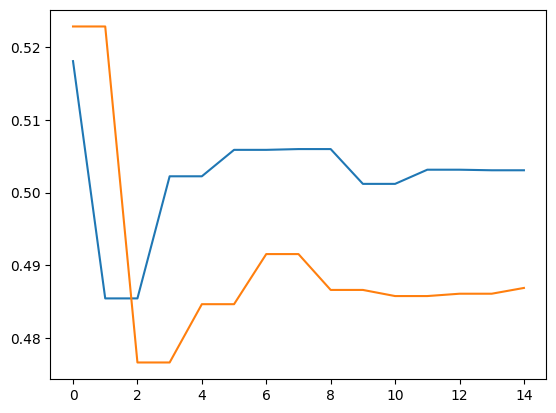

In [47]:
#Extract the first coordinate (x) for each pair and calculate column-wise mean
x_means = df.applymap(lambda pair: pair[0]).mean()
y_means = df.applymap(lambda pair: pair[1]).mean()
plt.plot(x_means)
plt.plot(y_means)

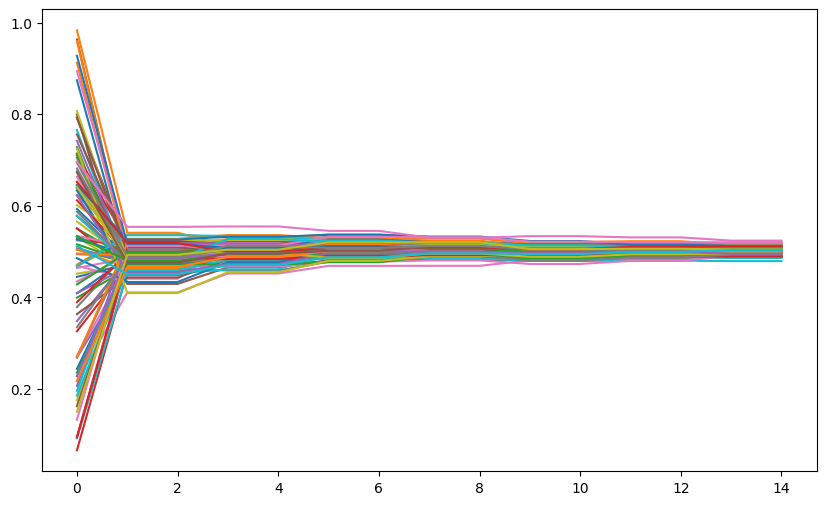

In [48]:
# Extract the first coordinate (x) for each pair
x_values = df.applymap(lambda pair: pair[0])

# Plot the first coordinate for each row
plt.figure(figsize=(10, 6))
for row_idx in range(x_values.shape[0]):
    plt.plot(x_values.columns, x_values.iloc[row_idx, :], label=f'Row {row_idx+1}' if row_idx < 5 else None)